### Complejidad - Práctico 1/6 - Redes complejas 
#### Lautaro Giordano
Este trabajo es acerca de la primera propuesta de Marcelo sobre buscar algún mecanismo o red compleja que ademas de ser Small-World y Scale-Free, tenga por valores altos de Clustering. En mi caso, decidí explorar con un tipo de redes conocidas como Redes de Umbral Geográfico (GTG, por sus siglas en ingles), que aparecieron por primera vez en el siguiente paper:
 
[Geographical threshold graphs with small-world and scale-free properties](https://arxiv.org/pdf/cond-mat/0409378).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#### Parámetros y funciones útiles

In [49]:
N = 200
theta = 300

def plot_network(G):
    pos = nx.get_node_attributes(G, 'pos')
    size = list(nx.get_node_attributes(G, 'weight'))
    size = [s/3 for s in size]
    nx.draw(G, pos, node_size=size, width=.3)
    plt.show()

def print_network_info(G, verbose=False):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    avg_degree, std_degree = np.mean(list(dict(G.degree()).values())), np.std(list(dict(G.degree()).values()))
    avg_clustering = nx.average_clustering(G)
    avg_shortest_path = nx.average_shortest_path_length(G0)

    if verbose:
        print(f'Average degree: {avg_degree:.2f} ± {std_degree:.2f}')
        print(f'Average clustering: {avg_clustering:.2f}')
        print(f'Average path length: {avg_shortest_path:.2f}')

    return avg_degree, std_degree, avg_clustering, avg_shortest_path

beta = .35
def r_beta(x):
    return x**-beta

def r_0(x):
    return 1

#### Cómo se ve una GTG?

Average degree: 4.19 ± 2.80
Average clustering: 0.56
Average path length: 8.90


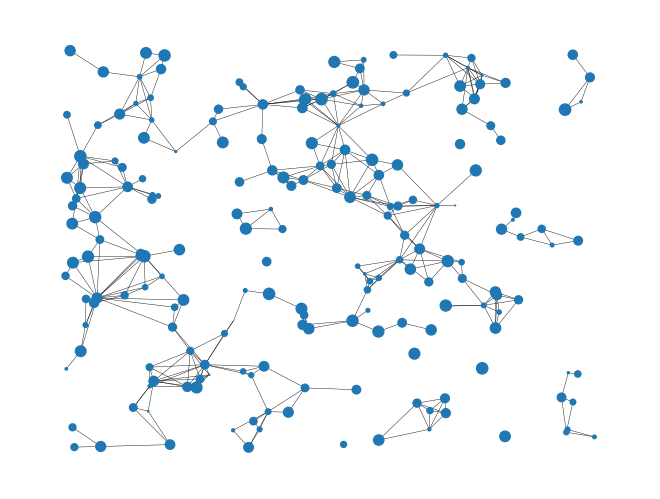

In [50]:
G = nx.geographical_threshold_graph(N, theta=theta, seed=10)

print_network_info(G, verbose=True)
plot_network(G)

#### Distribución de grado

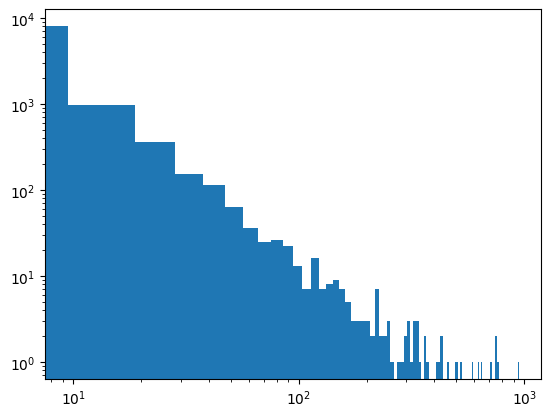

In [61]:
N = 1000
reps = 10
theta = 10

degrees = []

for _ in range(reps):
    G = nx.geographical_threshold_graph(N, theta=theta, p_dist=r_beta)
    for node in G.nodes():
        degrees.append(G.degree(node))

plt.hist(degrees, bins=100);
plt.xscale('log')
plt.yscale('log')

#### Grado medio vs N y theta

In [51]:
N_set = [200, 500, 1000]
theta_set = np.linspace(100, 2000, 20)
seeds = [1, 2, 3]
reps = 10

grados = {N: [] for N in N_set}

# Quiero armar un grafico de promedio de grado en funcion de theta para distintos N
# Promediando 10 grafos por punto
for N, seed in zip(N_set, seeds):
    for theta in theta_set:
        for _ in range(reps):
            aux = []
            G = nx.geographical_threshold_graph(N, theta=theta, seed=seed, p_dist=r_beta)
            avg_degree = np.mean(list(dict(G.degree()).values()))
            aux.append(avg_degree)
        grados[N].append(np.mean(aux))

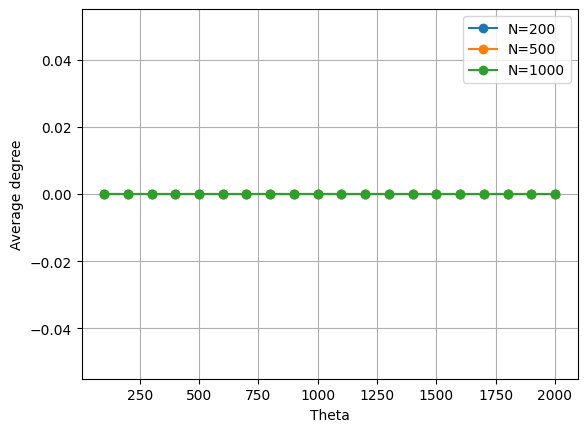

In [52]:
# Plot
for N in N_set:
    plt.plot(theta_set, grados[N], label=f'N={N}', marker='o')

plt.xlabel('Theta')
plt.ylabel('Average degree')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

El grado medio decae exponencialmente con theta independientemente del tamaño.

### Qué falta?
- Mostrar cómo se construye la red
- Explicar el umbral (k medio vs theta)
- Explicar el parámetro beta, modificar para hacerlo más bajo
- Mostrar que es Small-World (avg path length vs N)
- Mostrar que es Scale-Free (degree distribution)
- Mostrar que tiene alto Clustering y explicar por qué sucecde con menor beta (clustering vs N y clustering vs beta) 